# Importar a Base de dados

In [9]:
import pandas as pd

tabela = pd.read_csv("Data/advertising.csv")
print(tabela)

        TV  Radio  Jornal  Vendas
0    230.1   37.8    69.2    22.1
1     44.5   39.3    45.1    10.4
2     17.2   45.9    69.3    12.0
3    151.5   41.3    58.5    16.5
4    180.8   10.8    58.4    17.9
..     ...    ...     ...     ...
195   38.2    3.7    13.8     7.6
196   94.2    4.9     8.1    14.0
197  177.0    9.3     6.4    14.8
198  283.6   42.0    66.2    25.5
199  232.1    8.6     8.7    18.4

[200 rows x 4 columns]


Nao vamos presisar de fazer uam Limpeza de dados

# Análise Exploratória
- visualizando como as informações de cada item estão distribuídas
- correlação entre cada um dos itens

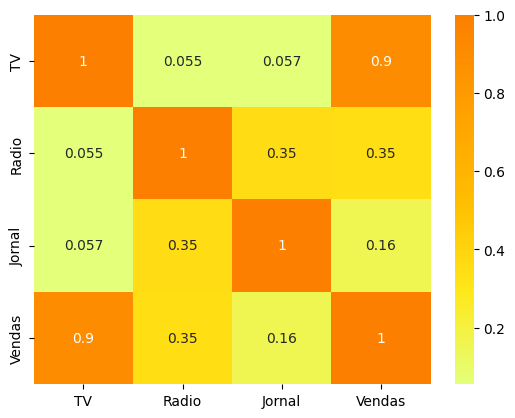

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr(), annot=True, cmap="Wistia")
plt.show()

# outra forma de ver a mesma análise
# sns.pairplot(tabela)
# plt.show()

#### Preparação dos dados para treinar o Modelo 

- Separando em dados de treino e dados de teste

In [11]:
from sklearn.model_selection import train_test_split

y = tabela["Vendas"]
x = tabela.drop("Vendas", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Escolha dos modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria as inteligencias aritificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina as inteligencias artificias
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [13]:
from sklearn import metrics

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

0.9071151423684273
0.9647738785414737


#### Visualização Gráfica das Previsões

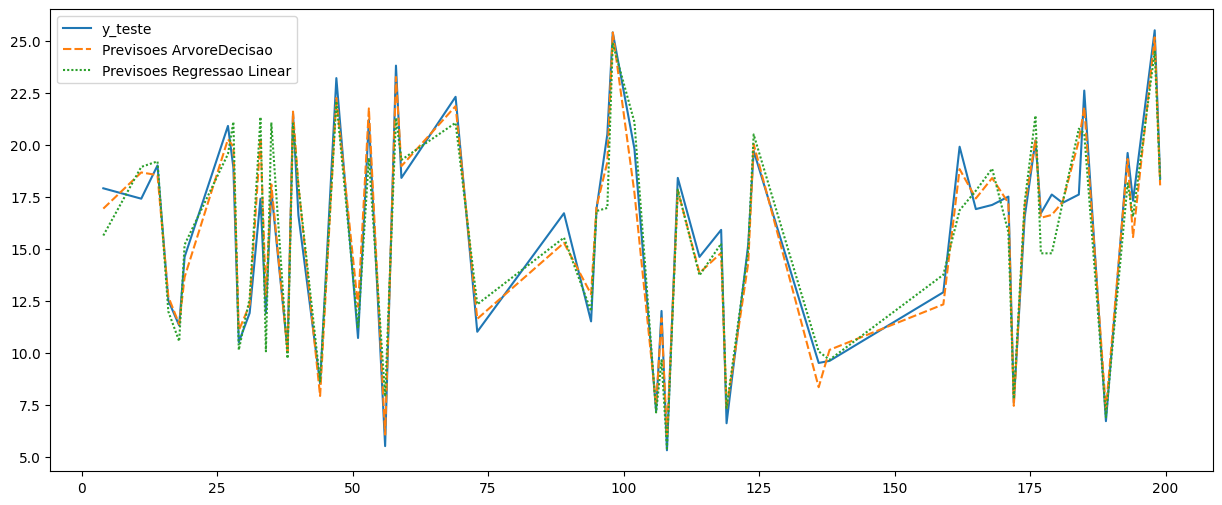

In [14]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Uma nova previsao
- Colocando os novos dados a prova para o modelo escolhido

In [15]:
# importar a nova_tabela com o pandas (a nova tabela tem que ter os dados de TV, Radio e Jornal)
# previsao = modelo_randomforest.predict(nova_tabela)
# print(previsao)
nova_tabela = pd.read_csv("Data/novos.csv")
print(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

      TV  Radio  Jornal
0   23.1    3.8    69.2
1   44.5    0.0     5.1
2  170.2   45.9     0.0
[ 7.894  8.405 20.141]


#### importância de cada variável para as vendas de cada categoria

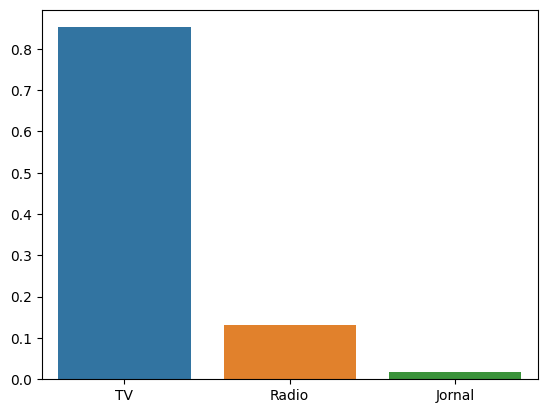

In [16]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

# Caso queira comparar Radio com Jornal
# print(df[["Radio", "Jornal"]].sum())